# K-Nearest Neighbors Algorithm (Classification)

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
sys.path.append("./util/gen_data")
from util.gen_data import gen_people_default
%matplotlib inline

In [2]:
data = gen_people_default(50_000, female_label=1, male_label=2)
data.head(5)

,height,weight,gender
0,174.927484,85.178523,2
1,171.547571,84.695278,2
2,158.167131,66.062211,1
3,148.610369,57.705479,1
4,158.127449,52.540065,1


In [3]:
train, test = train_test_split(data, test_size=0.2)

train_x = train[['height', 'weight']]
train_y = train['gender']
test_x = test[['height', 'weight']]
test_y = test['gender']

train_x.head(5)

,height,weight
64739,149.834001,62.471931
97456,180.064339,71.819665
37617,165.410121,73.958317
96119,172.700540,81.418529
94027,151.525729,50.938208


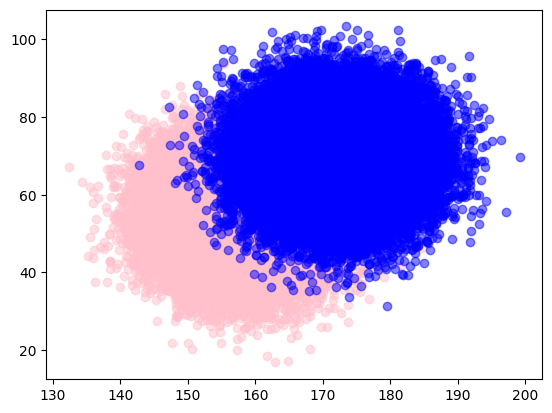

In [4]:
female = train[train['gender'] == 1]
male = train[train['gender'] == 2]

plt.scatter(female['height'], female['weight'], color='pink', alpha=0.5)
plt.scatter(male['height'], male['weight'], color='blue', alpha=0.5)

In [5]:
k = 10

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=10)

In [6]:
def to_df(h, w):
  return pd.DataFrame({'height': [h], 'weight': [w]})

def test_male(h, w):
  assert(knn.predict(to_df(h, w)) == 2)

def test_female(h, w):
  assert(knn.predict(to_df(h, w)) == 1)

test_male(195, 100)
test_male(178, 62)
test_male(178, 75)
test_male(171, 80)
test_male(172, 62)

test_female(160, 55)
test_female(150, 53)
test_female(158, 80)
test_female(164, 54)
test_female(163, 57)

In [7]:
from sklearn.metrics import confusion_matrix, f1_score

In [8]:
predicted = knn.predict(test_x)

print(confusion_matrix(test_y, predicted))
print(f1_score(test_y, predicted))

[[9242  743]
 [ 995 9020]]
0.9140540005934132
